# Normal Distribution

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("D:\DataSets\weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.drop('Weight',axis=1,inplace=True)  #dropping weight column

In [5]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [6]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

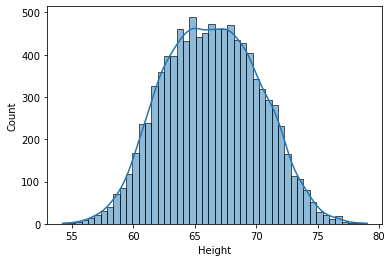

In [7]:
sns.histplot(df.Height,kde=True)

In [8]:
mean=df.Height.mean()
mean

66.36755975482106

In [9]:
std=df.Height.std()
std

3.8475281207732324

In [10]:
mean-3*std

54.82497539250136

In [11]:
mean+3*std

77.91014411714076

Values > 77.91014411714076 and values < 54.82497539250136 are outliers 

In [12]:
df[(df.Height > 77.91014411714076) | (df.Height < 54.82497539250136) ]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
df_no_outliers=df[(df.Height < 77.91014411714076) & (df.Height > 54.82497539250136)]
df_no_outliers.shape  # Created a new dataset by removing  7 outliers 

(9993, 2)

# Z Score

In [14]:
df['z_score']=(df.Height-df.Height.mean())/df.Height.std()

In [15]:
df.head()

,Gender,Height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [16]:
df[(df['z_score'] > 3) | (df.z_score < -3)]

,Gender,Height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [17]:
df_no_outliers=df[(df['z_score'] < 3) & (df.z_score > -3)]
df_no_outliers.shape  #we created a new  dataset by removing 7 outliers

(9993, 3)

# 

# Median ,Mean ,Mode & Percentile

In [20]:
data= {'name':['a','b','c','d','e','f','musk'],
       'income':[5000,6000,4000,7500,8000,7000,1000000]
      }

In [21]:
df1=pd.DataFrame(data)

In [22]:
df1  #we can see musk is an outlier

,name,income
0,a,5000
1,b,6000
2,c,4000
3,d,7500
4,e,8000
5,f,7000
6,musk,1000000


In [23]:
df1.describe()

,income
count,7.000000
mean,148214.285714
std,375604.829702
min,4000.000000
25%,5500.000000
50%,7000.000000
75%,7750.000000
max,1000000.000000


In [24]:
df1.income.quantile(0.75)#there is interpolation attribute in quantile function

7750.0

In [25]:
df1.income.quantile(0.25)

5500.0

In [26]:
df1.income.quantile(1)

1000000.0

In [27]:
percentile_99=df1.income.quantile(0.99)

In [28]:
no_outlier_df=df1[df1.income<percentile_99]

In [29]:
no_outlier_df  #we can see the oulier musk is removed using percentile

,name,income
0,a,5000
1,b,6000
2,c,4000
3,d,7500
4,e,8000
5,f,7000


# 

Let's make one value null so that we can fill it using median

In [30]:
df1

,name,income
0,a,5000
1,b,6000
2,c,4000
3,d,7500
4,e,8000
5,f,7000
6,musk,1000000


In [31]:
import numpy as np

In [32]:
df1.income[3]=np.NaN

C:\Users\P PAVAN REDDY\AppData\Local\Temp\ipykernel_14156\679849392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.income[3]=np.NaN


In [33]:
df1

,name,income
0,a,5000.0
1,b,6000.0
2,c,4000.0
3,d,NaN
4,e,8000.0
5,f,7000.0
6,musk,1000000.0


In [34]:
df1.income.mean()  # if we calculate mean with having an ouliter to fill Na it is a bad idea,because value is abnormal

171666.66666666666

In [35]:
df_new=df1.fillna(df1.income.mean())
df_new

,name,income
0,a,5000.000000
1,b,6000.000000
2,c,4000.000000
3,d,171666.666667
4,e,8000.000000
5,f,7000.000000
6,musk,1000000.000000


In [36]:
#instead of mean we can use median
df1.income.median()

6500.0

In [37]:
#we use fillna
df_new=df1.fillna(df1.income.median())

In [38]:
df_new  #now the value is good and accurate

,name,income
0,a,5000.0
1,b,6000.0
2,c,4000.0
3,d,6500.0
4,e,8000.0
5,f,7000.0
6,musk,1000000.0


### Exercise

In [39]:
d=pd.read_csv("D:\DataSets\AB_NYC_2019.csv")

In [40]:
d.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [44]:
d.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [46]:
d.price.dtypes

dtype('int64')

In [47]:
d.price.quantile(0.75)

175.0

In [48]:
d.price.quantile(0.25)

69.0

In [49]:
d.price.quantile(1) # we can see clearly this is an outlier

10000.0

In [76]:
min_threshold=d.price.quantile(0.01)
min_threshold

30.0

In [77]:
max_threshold=d.price.quantile(.99)
max_threshod

799.0

In [78]:
d_outlier_free = d[(d.price<max_threshold) & (d.price>min_threshold)]

In [79]:
d_outlier_free.price.describe()

count    47744.000000
mean       138.832503
std        102.890554
min         31.000000
25%         70.000000
50%        108.000000
75%        175.000000
max        795.000000
Name: price, dtype: float64

In [87]:
d_outlier_free.price.sample(5)

35762    110
39817    150
8440     300
47728     75
18575     50
Name: price, dtype: int64